In [27]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import interpolate

In [28]:
### Definitions ###

def angle_to_eta(theta):
    return LSS_radius*theta#/np.sqrt(4*np.pi)

def LSS_loc(r):
    loc = -eta+grid_len_r*r # Find distance from LSS (negative = inside, positive = outside)
    return loc

def dist_2spot(r1,r2,x,y):    # flag:  if separation is large, the curvature is involved so flat space approximation may fail
    delta_r = (r2-r1)*grid_len_r # in Mpc
    x_Mpc = x*grid_len_x # in Mpc
    y_Mpc = y*grid_len_x # in Mpc
    dist = np.sqrt(delta_r**2+x_Mpc**2+y_Mpc**2)
    return dist

def Get_Dis(x1,y1, x2,y2):
    return np.math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

def interpolation(x, y):
    return interpolate.interp1d(x, y)

### Definitions ###

num_sigs = 500

nside = 1024
LSS_radius = 13800

# A number of pixels
Npixels = 12*nside**2

# pixel size analytic(Rad)
pix_radsq = 4*np.pi/Npixels # Solid angle
pix_rad = np.sqrt(pix_radsq) # Square pixel side length in rad

pix_mpc = angle_to_eta(pix_rad) # (Mpc) 1 pixel size ~ 6.7 Mpc

eta = 160
r_bins = 50 # No need to change
grid_len_r = eta*2/r_bins # Mpc (each grid length)
grid_len_x = pix_mpc # Mpc = grid_len_y

ang_arr = np.logspace(-3.7, -0.7, num=100)
radius_arr = angle_to_eta(ang_arr) # Mpc
pix_arr = (0.2+np.arange(0,25))* grid_len_x

In [29]:
Profiles = np.loadtxt("./Eventcode/new_profile_singlePHS_projection/SW_stack.txt")
profile1D = Profiles[25]
SWprofle1 = interpolation(radius_arr, profile1D)

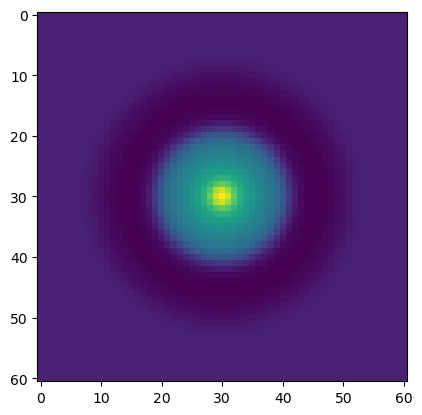

In [78]:
from pylab import*
bound= 30
#steps = 50
x=grid_len_x*linspace(-bound,bound,2*bound+1)
y=grid_len_x*linspace(-bound,bound,2*bound+1)
x[x==0]=3
y[y==0]=3
xx,yy=meshgrid(x,y)
#int(np.sqrt(xx**2.0+yy**2.0))
z=SWprofle1(np.sqrt(xx**2+yy**2).astype(int))
imshow(z)